In [4]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('merged1538945834.868107.csv')

In [5]:
df.head()

,tweet_id,Unnamed: 0,created_at,handle,mined_at,retweet_count,text
0,1048727214253113349,0,Sun Oct 07 00:10:26 +0000 2018,superwoman⚔,2018-10-06 21:10:50.788029,2218,RT @OJARDELITO: *PESQUISA - VÉSPERA DA ELEIÇÃO...
1,1048727190899232768,1,Sun Oct 07 00:10:21 +0000 2018,Alan Izaias Garus Prodelik,2018-10-06 21:10:50.788029,0,"Com os números recentes do Ibope e Datafolha,..."
2,1048727190437879808,2,Sun Oct 07 00:10:21 +0000 2018,Rodrigo,2018-10-06 21:10:50.788029,239,RT @congemfoco: Nossa opinião: a dupla Bolsona...
3,1048727185643720704,3,Sun Oct 07 00:10:20 +0000 2018,Gomes Miguel,2018-10-06 21:10:50.788029,668,RT @TSEjusbr: Quem registrar o voto com máquin...
4,1048727170594607110,4,Sun Oct 07 00:10:16 +0000 2018,⚜ TelBoni 🌞,2018-10-06 21:10:50.788029,0,"Mano. Meu. Paulista come cocô mesmo, PSDB ajud..."


In [6]:
df.shape

(106908, 7)

In [7]:
from datetime import datetime, timezone

def twitterdate_to_datetime(twitterdate):
    return datetime.strptime(twitterdate, '%a %b %d %X %z %Y').replace(tzinfo=timezone.utc).astimezone(tz=None)
    
def datetime_to_integer(datetime):
    return round(datetime.timestamp())

df['created_at'] = df['created_at'].map(twitterdate_to_datetime)
df['created_at_int'] = df['created_at'].map(datetime_to_integer)
df['created_at_day'] = df['created_at'].map(lambda x: x.day)
df['created_at_hour_int'] = df['created_at'].map(lambda x: x.time().hour)
df['created_at_hour_float'] = df['created_at'].map(lambda x: x.time().hour + (x.time().minute * x.time().second) / 3600)

In [8]:
df.head()

,tweet_id,Unnamed: 0,created_at,handle,mined_at,retweet_count,text,created_at_int,created_at_day,created_at_hour_int,created_at_hour_float
0,1048727214253113349,0,2018-10-06 21:10:26-03:00,superwoman⚔,2018-10-06 21:10:50.788029,2218,RT @OJARDELITO: *PESQUISA - VÉSPERA DA ELEIÇÃO...,1538871026,6,21,21.072222
1,1048727190899232768,1,2018-10-06 21:10:21-03:00,Alan Izaias Garus Prodelik,2018-10-06 21:10:50.788029,0,"Com os números recentes do Ibope e Datafolha,...",1538871021,6,21,21.058333
2,1048727190437879808,2,2018-10-06 21:10:21-03:00,Rodrigo,2018-10-06 21:10:50.788029,239,RT @congemfoco: Nossa opinião: a dupla Bolsona...,1538871021,6,21,21.058333
3,1048727185643720704,3,2018-10-06 21:10:20-03:00,Gomes Miguel,2018-10-06 21:10:50.788029,668,RT @TSEjusbr: Quem registrar o voto com máquin...,1538871020,6,21,21.055556
4,1048727170594607110,4,2018-10-06 21:10:16-03:00,⚜ TelBoni 🌞,2018-10-06 21:10:50.788029,0,"Mano. Meu. Paulista come cocô mesmo, PSDB ajud...",1538871016,6,21,21.044444


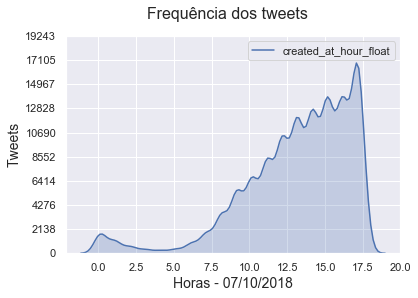

In [9]:
fig = sns.kdeplot(df.loc[df['created_at_day'] == 7, 'created_at_hour_float'], shade=True)

fig.figure.suptitle("Frequência dos tweets", fontsize = 16)

plt.xlabel('Horas - 07/10/2018', fontsize=14)

plt.ylabel('Tweets', fontsize=14)
plt.yticks(fig.get_yticks(), (fig.get_yticks() * df.shape[0]).astype(int))
plt.show()

In [100]:
def kdeplot_by_keywords(keyword_matrix):
    df_day = df[df['created_at_day'] == 7]
    
    legends = []
    
    for keywords in keyword_matrix:
        sub_df = df_day[df_day['text'].str.contains('|'.join(keywords), regex=True, case=False)]
        fig = sns.lineplot(data=sub_df['created_at_hour_int'].value_counts())
        legends.append(', '.join(keywords))
    
    fig.figure.suptitle('Ocorrências de palavras-chaves', fontsize = 16)

    plt.xlabel('Horas - 07/10/2018', fontsize=14)
    plt.ylabel('Ocorrências', fontsize=14)
    plt.legend(legends)


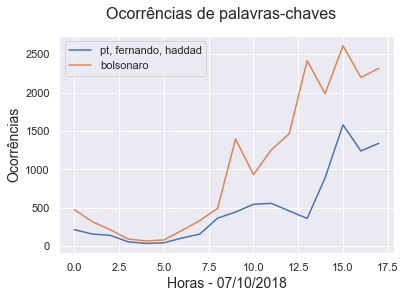

In [101]:
kdeplot_by_keywords([['pt', 'fernando', 'haddad'], ['bolsonaro']])

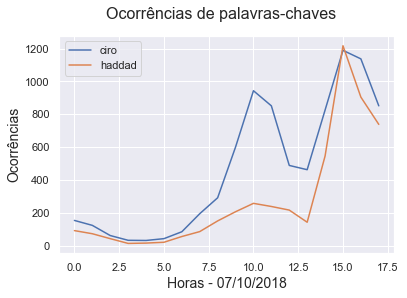

In [106]:
kdeplot_by_keywords([['ciro'], ['haddad']])